In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("GSPC_2021.csv", index_col = 0, parse_dates = True)

In [33]:
ts = df["^GSPC"]

In [34]:
plt.rc("figure", figsize=(16, 6)) # rc = runtime configuration

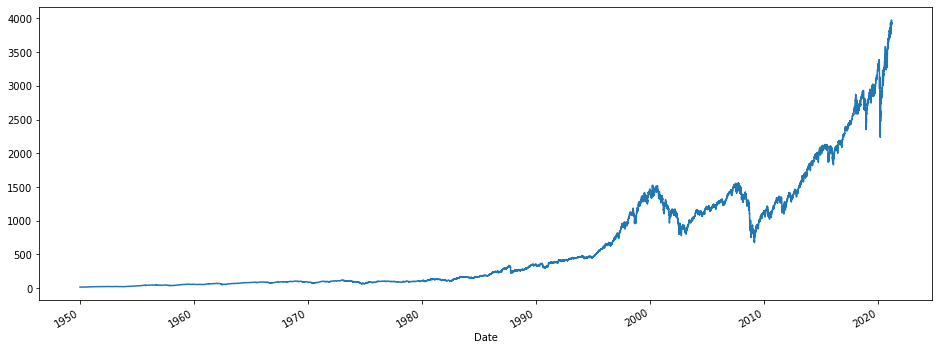

In [35]:
ts.plot()

In [36]:
logts = np.log(ts)

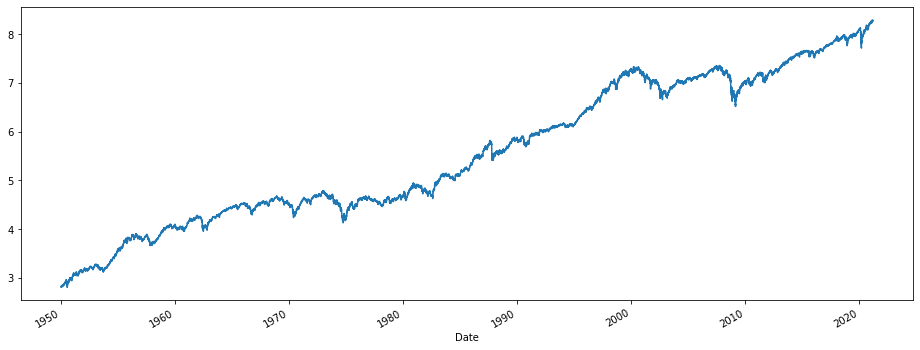

In [37]:
logts.plot()

In [38]:
returns = 100*logts.diff().dropna()

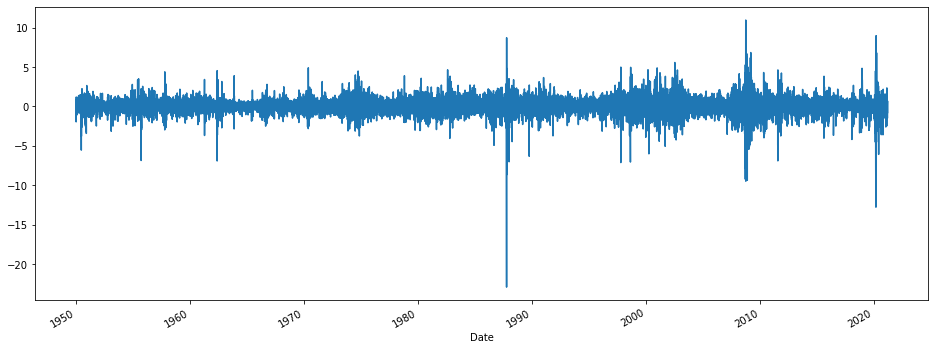

In [39]:
returns.plot()

In [40]:
returns.describe()

count    17920.000000
mean         0.030460
std          0.991713
min        -22.899729
25%         -0.403639
50%          0.048844
75%          0.499752
max         10.957197
Name: ^GSPC, dtype: float64

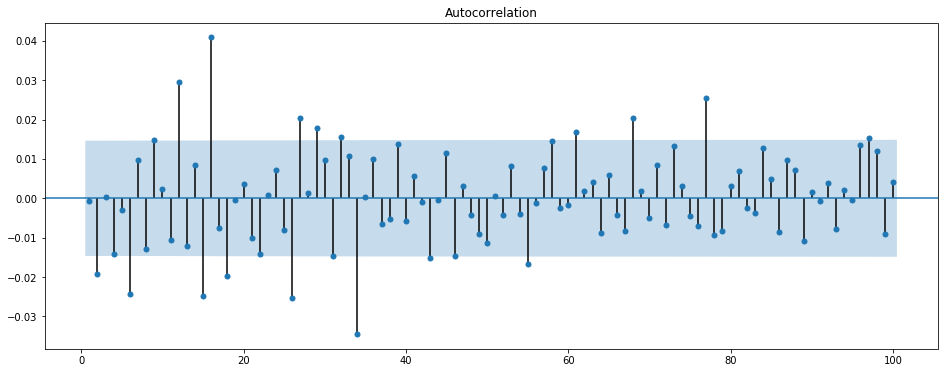

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns,lags=range(1,101));

In [42]:
returnsSquared = returns*returns

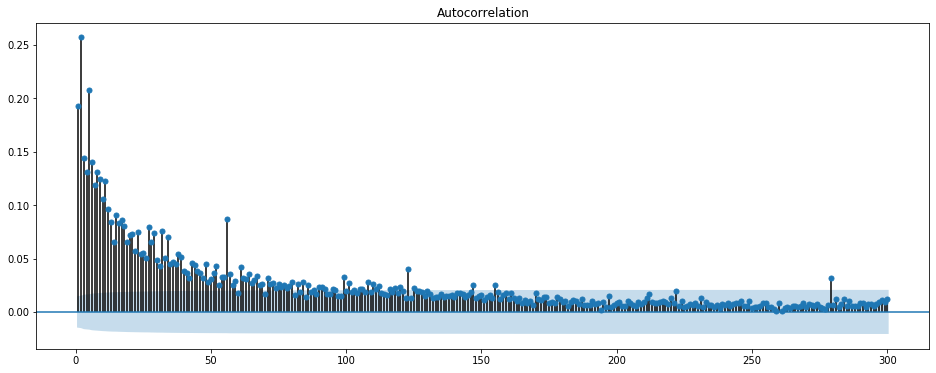

In [43]:
plot_acf(returnsSquared,lags=range(1,301));

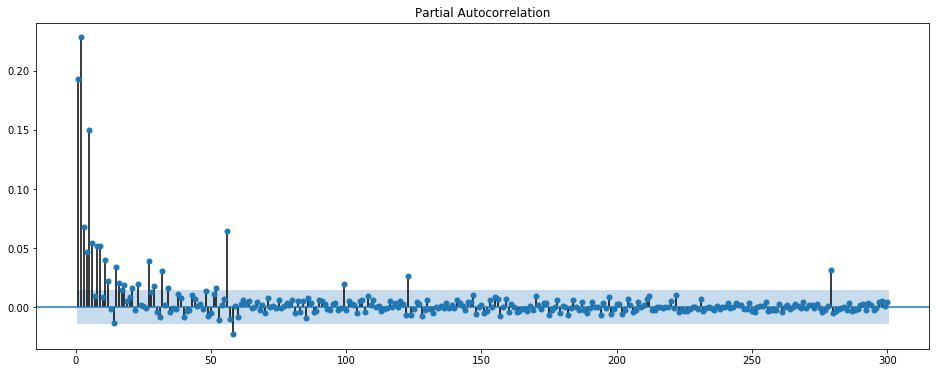

In [44]:
plot_pacf(returnsSquared,lags=range(1,301));

In [45]:
# ! pip install arch

In [46]:
from arch import arch_model

In [47]:
am = arch_model(returns)

In [48]:
fit = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21628.90104835164
Iteration:      2,   Func. Count:     17,   Neg. LLF: 21620.717222984866
Iteration:      3,   Func. Count:     26,   Neg. LLF: 21617.48324460558
Iteration:      4,   Func. Count:     33,   Neg. LLF: 21609.05535272595
Iteration:      5,   Func. Count:     42,   Neg. LLF: 21608.8695249287
Iteration:      6,   Func. Count:     49,   Neg. LLF: 21600.902719533915
Iteration:      7,   Func. Count:     56,   Neg. LLF: 21600.381449735345
Iteration:      8,   Func. Count:     63,   Neg. LLF: 21599.15661411486
Iteration:      9,   Func. Count:     69,   Neg. LLF: 21598.987831678816
Iteration:     10,   Func. Count:     75,   Neg. LLF: 21598.982363538627
Iteration:     11,   Func. Count:     81,   Neg. LLF: 21598.98234928877
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 21598.98234928815
            Iterations: 11
            Function evaluations: 81
            Gradient evaluation

In [49]:
fit

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -21599.0
Distribution:                  Normal   AIC:                           43206.0
Method:            Maximum Likelihood   BIC:                           43237.1
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:09   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0510  6.284e-03      8.116  4.824e-16 [3.

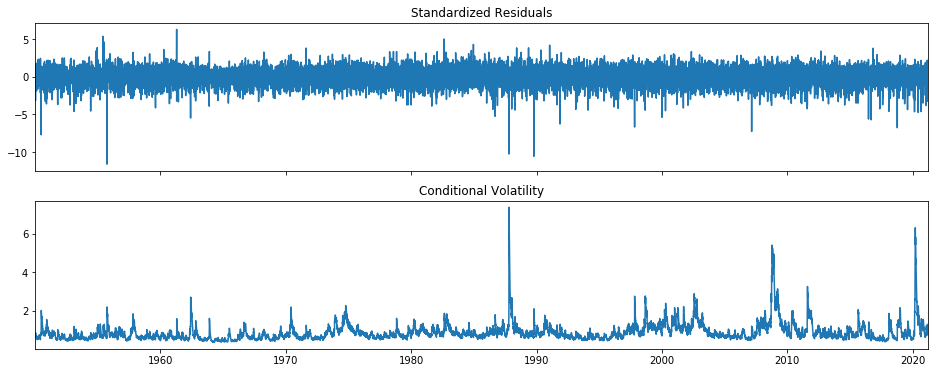

In [50]:
fit.plot();

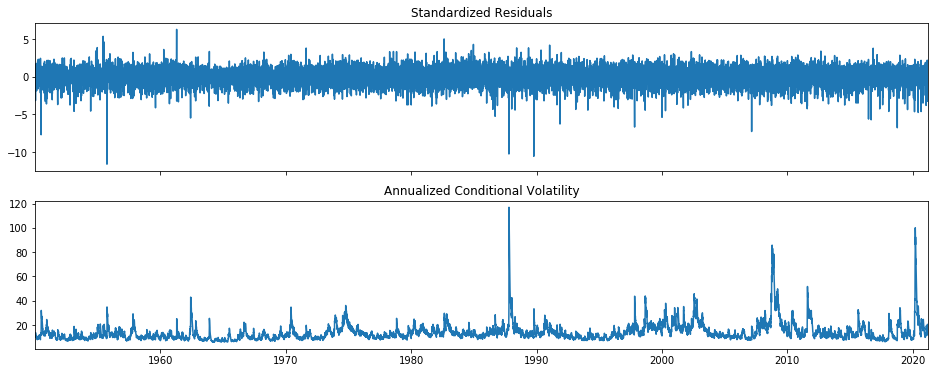

In [51]:
fit.plot(annualize="D");

In [52]:
arch_model(returns, vol='ARCH', p=1).fit(disp='off')

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -23878.4
Distribution:                  Normal   AIC:                           47762.9
Method:            Maximum Likelihood   BIC:                           47786.2
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:11   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0480  7.855e-03      6.113  9.747e-10 [3.

In [53]:
arch_model(returns, vol='ARCH', p=10).fit(disp='off')

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -21710.1
Distribution:                  Normal   AIC:                           43444.2
Method:            Maximum Likelihood   BIC:                           43537.7
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:12   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0556  6.015e-03      9.246  2.330e-20 [4.

In [54]:
arch_model(returns, vol='GARCH', p=1, q=2).fit(disp='off')

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -21592.9
Distribution:                  Normal   AIC:                           43195.7
Method:            Maximum Likelihood   BIC:                           43234.7
                                        No. Observations:                17920
Date:                Wed, Mar 24 2021   Df Residuals:                    17919
Time:                        11:08:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0512  6.290e-03      8.138  4.005e-16 [3.